In [46]:
width = 299
height = 299
channels = 3

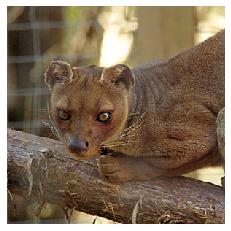

In [54]:
import matplotlib.image as mpimg
import os 
import matplotlib.pyplot as plt

test_image = mpimg.imread(os.path.join("images","fossa.jpg"))[:height,:width,:channels]
plt.imshow(test_image)
plt.axis("off")
plt.show()

In [56]:
test_image = 2 * test_image -1

In [57]:
print(test_image.shape)
test_image.reshape(-1,299,299,3)
test_image.shape

(299, 299, 3)


(299, 299, 3)

### Downloading the inception v3 model

In [10]:
import sys
import tarfile
from six.moves import urllib

TF_MODELS_URL = "http://download.tensorflow.org/models"
INCEPTION_V3_URL = TF_MODELS_URL + "/inception_v3_2016_08_28.tar.gz"
INCEPTION_PATH = os.path.join("datasets", "inception")
INCEPTION_V3_CHECKPOINT_PATH = os.path.join(INCEPTION_PATH,"inception_v3.ckpt")

def download_progress(count, block_size, total_size):
    percent = count * block_size * 100 // total_size
    sys.stdout.write("Downloading: {}%".format(percent))
    sys.stdout.flush()

def fetch_pretrained_inception_v3(url=INCEPTION_V3_URL, path=INCEPTION_PATH ):
    if os.path.exists(INCEPTION_V3_CHECKPOINT_PATH):
        return
    os.makedirs(path, exist_ok = True)
    tgz_path = os.path.join(path, "inception_v3.tgz")
    urllib.request.urlretrieve(url, tgz_path,reporthook=download_progress)
    inception_tgz = tarfile.open(tgz_path)
    inception_tgz.extractall(path=path)
    inception_tgz.close()
    os.remove(tgz_path)

In [11]:
fetch_pretrained_inception_v3()

Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloadin

Downloading: 4%Downloading: 4%Downloading: 4%Downloading: 4%Downloading: 4%Downloading: 4%Downloading: 4%Downloading: 4%Downloading: 4%Downloading: 4%Downloading: 4%Downloading: 4%Downloading: 4%Downloading: 4%Downloading: 4%Downloading: 4%Downloading: 4%Downloading: 4%Downloading: 4%Downloading: 4%Downloading: 4%Downloading: 4%Downloading: 4%Downloading: 4%Downloading: 4%Downloading: 4%Downloading: 4%Downloading: 4%Downloading: 4%Downloading: 4%Downloading: 4%Downloading: 4%Downloading: 4%Downloading: 4%Downloading: 4%Downloading: 4%Downloading: 4%Downloading: 4%Downloading: 4%Downloading: 4%Downloading: 4%Downloading: 4%Downloading: 4%Downloading: 4%Downloading: 4%Downloading: 4%Downloading: 4%Downloading: 4%Downloading: 4%Downloading: 4%Downloading: 4%Downloading: 4%Downloading: 4%Downloading: 4%Downloading: 4%Downloading: 4%Downloading: 4%Downloading: 4%Downloading: 4%Downloading: 4%Downloading: 4%Downloading: 4%Downloading: 4%Downloading: 4%Downloading: 4%Downloading: 4%Downloadin

Downloading: 8%Downloading: 8%Downloading: 8%Downloading: 8%Downloading: 8%Downloading: 8%Downloading: 8%Downloading: 8%Downloading: 8%Downloading: 8%Downloading: 8%Downloading: 8%Downloading: 8%Downloading: 8%Downloading: 8%Downloading: 9%Downloading: 9%Downloading: 9%Downloading: 9%Downloading: 9%Downloading: 9%Downloading: 9%Downloading: 9%Downloading: 9%Downloading: 9%Downloading: 9%Downloading: 9%Downloading: 9%Downloading: 9%Downloading: 9%Downloading: 9%Downloading: 9%Downloading: 9%Downloading: 9%Downloading: 9%Downloading: 9%Downloading: 9%Downloading: 9%Downloading: 9%Downloading: 9%Downloading: 9%Downloading: 9%Downloading: 9%Downloading: 9%Downloading: 9%Downloading: 9%Downloading: 9%Downloading: 9%Downloading: 9%Downloading: 9%Downloading: 9%Downloading: 9%Downloading: 9%Downloading: 9%Downloading: 9%Downloading: 9%Downloading: 9%Downloading: 9%Downloading: 9%Downloading: 9%Downloading: 9%Downloading: 9%Downloading: 9%Downloading: 9%Downloading: 9%Downloading: 9%Downloadin

Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Download

Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Download

Downloading: 21%Downloading: 21%Downloading: 21%Downloading: 21%Downloading: 21%Downloading: 21%Downloading: 21%Downloading: 21%Downloading: 21%Downloading: 21%Downloading: 21%Downloading: 21%Downloading: 21%Downloading: 21%Downloading: 21%Downloading: 21%Downloading: 21%Downloading: 21%Downloading: 21%Downloading: 21%Downloading: 21%Downloading: 21%Downloading: 21%Downloading: 21%Downloading: 21%Downloading: 21%Downloading: 21%Downloading: 21%Downloading: 21%Downloading: 21%Downloading: 21%Downloading: 21%Downloading: 21%Downloading: 21%Downloading: 21%Downloading: 21%Downloading: 21%Downloading: 21%Downloading: 21%Downloading: 21%Downloading: 21%Downloading: 21%Downloading: 21%Downloading: 21%Downloading: 21%Downloading: 21%Downloading: 21%Downloading: 21%Downloading: 21%Downloading: 21%Downloading: 21%Downloading: 21%Downloading: 21%Downloading: 21%Downloading: 21%Downloading: 21%Downloading: 21%Downloading: 21%Downloading: 21%Downloading: 21%Downloading: 21%Downloading: 21%Download

Downloading: 25%Downloading: 25%Downloading: 25%Downloading: 25%Downloading: 25%Downloading: 25%Downloading: 25%Downloading: 25%Downloading: 25%Downloading: 25%Downloading: 25%Downloading: 25%Downloading: 25%Downloading: 25%Downloading: 25%Downloading: 25%Downloading: 25%Downloading: 25%Downloading: 25%Downloading: 25%Downloading: 25%Downloading: 25%Downloading: 25%Downloading: 25%Downloading: 25%Downloading: 25%Downloading: 25%Downloading: 25%Downloading: 25%Downloading: 25%Downloading: 25%Downloading: 25%Downloading: 25%Downloading: 25%Downloading: 25%Downloading: 25%Downloading: 25%Downloading: 25%Downloading: 25%Downloading: 25%Downloading: 25%Downloading: 25%Downloading: 25%Downloading: 25%Downloading: 25%Downloading: 25%Downloading: 25%Downloading: 25%Downloading: 26%Downloading: 26%Downloading: 26%Downloading: 26%Downloading: 26%Downloading: 26%Downloading: 26%Downloading: 26%Downloading: 26%Downloading: 26%Downloading: 26%Downloading: 26%Downloading: 26%Downloading: 26%Download

Downloading: 29%Downloading: 29%Downloading: 29%Downloading: 29%Downloading: 29%Downloading: 29%Downloading: 29%Downloading: 29%Downloading: 29%Downloading: 29%Downloading: 29%Downloading: 29%Downloading: 29%Downloading: 29%Downloading: 29%Downloading: 29%Downloading: 29%Downloading: 29%Downloading: 29%Downloading: 29%Downloading: 29%Downloading: 29%Downloading: 29%Downloading: 29%Downloading: 29%Downloading: 29%Downloading: 29%Downloading: 29%Downloading: 30%Downloading: 30%Downloading: 30%Downloading: 30%Downloading: 30%Downloading: 30%Downloading: 30%Downloading: 30%Downloading: 30%Downloading: 30%Downloading: 30%Downloading: 30%Downloading: 30%Downloading: 30%Downloading: 30%Downloading: 30%Downloading: 30%Downloading: 30%Downloading: 30%Downloading: 30%Downloading: 30%Downloading: 30%Downloading: 30%Downloading: 30%Downloading: 30%Downloading: 30%Downloading: 30%Downloading: 30%Downloading: 30%Downloading: 30%Downloading: 30%Downloading: 30%Downloading: 30%Downloading: 30%Download

Downloading: 33%Downloading: 33%Downloading: 33%Downloading: 33%Downloading: 33%Downloading: 33%Downloading: 33%Downloading: 33%Downloading: 34%Downloading: 34%Downloading: 34%Downloading: 34%Downloading: 34%Downloading: 34%Downloading: 34%Downloading: 34%Downloading: 34%Downloading: 34%Downloading: 34%Downloading: 34%Downloading: 34%Downloading: 34%Downloading: 34%Downloading: 34%Downloading: 34%Downloading: 34%Downloading: 34%Downloading: 34%Downloading: 34%Downloading: 34%Downloading: 34%Downloading: 34%Downloading: 34%Downloading: 34%Downloading: 34%Downloading: 34%Downloading: 34%Downloading: 34%Downloading: 34%Downloading: 34%Downloading: 34%Downloading: 34%Downloading: 34%Downloading: 34%Downloading: 34%Downloading: 34%Downloading: 34%Downloading: 34%Downloading: 34%Downloading: 34%Downloading: 34%Downloading: 34%Downloading: 34%Downloading: 34%Downloading: 34%Downloading: 34%Downloading: 34%Downloading: 34%Downloading: 34%Downloading: 34%Downloading: 34%Downloading: 34%Download

Downloading: 38%Downloading: 38%Downloading: 38%Downloading: 38%Downloading: 38%Downloading: 38%Downloading: 38%Downloading: 38%Downloading: 38%Downloading: 38%Downloading: 38%Downloading: 38%Downloading: 38%Downloading: 38%Downloading: 38%Downloading: 38%Downloading: 38%Downloading: 38%Downloading: 38%Downloading: 38%Downloading: 38%Downloading: 38%Downloading: 38%Downloading: 38%Downloading: 38%Downloading: 38%Downloading: 38%Downloading: 38%Downloading: 38%Downloading: 38%Downloading: 38%Downloading: 38%Downloading: 38%Downloading: 38%Downloading: 38%Downloading: 38%Downloading: 38%Downloading: 38%Downloading: 38%Downloading: 38%Downloading: 38%Downloading: 38%Downloading: 38%Downloading: 38%Downloading: 38%Downloading: 38%Downloading: 38%Downloading: 38%Downloading: 38%Downloading: 38%Downloading: 38%Downloading: 38%Downloading: 38%Downloading: 38%Downloading: 38%Downloading: 38%Downloading: 38%Downloading: 38%Downloading: 38%Downloading: 38%Downloading: 38%Downloading: 38%Download

Downloading: 42%Downloading: 42%Downloading: 42%Downloading: 42%Downloading: 42%Downloading: 42%Downloading: 42%Downloading: 42%Downloading: 42%Downloading: 42%Downloading: 42%Downloading: 42%Downloading: 42%Downloading: 42%Downloading: 42%Downloading: 42%Downloading: 42%Downloading: 42%Downloading: 42%Downloading: 42%Downloading: 42%Downloading: 42%Downloading: 42%Downloading: 42%Downloading: 42%Downloading: 42%Downloading: 42%Downloading: 42%Downloading: 42%Downloading: 42%Downloading: 42%Downloading: 42%Downloading: 42%Downloading: 42%Downloading: 42%Downloading: 42%Downloading: 42%Downloading: 42%Downloading: 42%Downloading: 42%Downloading: 42%Downloading: 42%Downloading: 42%Downloading: 42%Downloading: 42%Downloading: 42%Downloading: 42%Downloading: 42%Downloading: 42%Downloading: 42%Downloading: 42%Downloading: 42%Downloading: 42%Downloading: 42%Downloading: 42%Downloading: 42%Downloading: 42%Downloading: 42%Downloading: 42%Downloading: 42%Downloading: 42%Downloading: 42%Download

Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Download

Downloading: 50%Downloading: 50%Downloading: 50%Downloading: 50%Downloading: 50%Downloading: 50%Downloading: 50%Downloading: 50%Downloading: 50%Downloading: 50%Downloading: 50%Downloading: 50%Downloading: 50%Downloading: 50%Downloading: 50%Downloading: 50%Downloading: 50%Downloading: 50%Downloading: 50%Downloading: 50%Downloading: 50%Downloading: 50%Downloading: 50%Downloading: 50%Downloading: 50%Downloading: 50%Downloading: 50%Downloading: 50%Downloading: 50%Downloading: 50%Downloading: 50%Downloading: 50%Downloading: 50%Downloading: 50%Downloading: 50%Downloading: 50%Downloading: 50%Downloading: 50%Downloading: 50%Downloading: 50%Downloading: 50%Downloading: 50%Downloading: 50%Downloading: 50%Downloading: 50%Downloading: 50%Downloading: 50%Downloading: 50%Downloading: 50%Downloading: 51%Downloading: 51%Downloading: 51%Downloading: 51%Downloading: 51%Downloading: 51%Downloading: 51%Downloading: 51%Downloading: 51%Downloading: 51%Downloading: 51%Downloading: 51%Downloading: 51%Download

Downloading: 54%Downloading: 54%Downloading: 54%Downloading: 54%Downloading: 54%Downloading: 54%Downloading: 54%Downloading: 54%Downloading: 54%Downloading: 54%Downloading: 54%Downloading: 54%Downloading: 54%Downloading: 54%Downloading: 54%Downloading: 54%Downloading: 54%Downloading: 54%Downloading: 54%Downloading: 54%Downloading: 54%Downloading: 54%Downloading: 54%Downloading: 54%Downloading: 54%Downloading: 54%Downloading: 54%Downloading: 54%Downloading: 54%Downloading: 55%Downloading: 55%Downloading: 55%Downloading: 55%Downloading: 55%Downloading: 55%Downloading: 55%Downloading: 55%Downloading: 55%Downloading: 55%Downloading: 55%Downloading: 55%Downloading: 55%Downloading: 55%Downloading: 55%Downloading: 55%Downloading: 55%Downloading: 55%Downloading: 55%Downloading: 55%Downloading: 55%Downloading: 55%Downloading: 55%Downloading: 55%Downloading: 55%Downloading: 55%Downloading: 55%Downloading: 55%Downloading: 55%Downloading: 55%Downloading: 55%Downloading: 55%Downloading: 55%Download

Downloading: 58%Downloading: 58%Downloading: 58%Downloading: 58%Downloading: 58%Downloading: 58%Downloading: 58%Downloading: 58%Downloading: 59%Downloading: 59%Downloading: 59%Downloading: 59%Downloading: 59%Downloading: 59%Downloading: 59%Downloading: 59%Downloading: 59%Downloading: 59%Downloading: 59%Downloading: 59%Downloading: 59%Downloading: 59%Downloading: 59%Downloading: 59%Downloading: 59%Downloading: 59%Downloading: 59%Downloading: 59%Downloading: 59%Downloading: 59%Downloading: 59%Downloading: 59%Downloading: 59%Downloading: 59%Downloading: 59%Downloading: 59%Downloading: 59%Downloading: 59%Downloading: 59%Downloading: 59%Downloading: 59%Downloading: 59%Downloading: 59%Downloading: 59%Downloading: 59%Downloading: 59%Downloading: 59%Downloading: 59%Downloading: 59%Downloading: 59%Downloading: 59%Downloading: 59%Downloading: 59%Downloading: 59%Downloading: 59%Downloading: 59%Downloading: 59%Downloading: 59%Downloading: 59%Downloading: 59%Downloading: 59%Downloading: 59%Download

Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Download

Downloading: 67%Downloading: 67%Downloading: 67%Downloading: 67%Downloading: 67%Downloading: 67%Downloading: 67%Downloading: 67%Downloading: 67%Downloading: 67%Downloading: 67%Downloading: 67%Downloading: 67%Downloading: 67%Downloading: 67%Downloading: 67%Downloading: 67%Downloading: 67%Downloading: 67%Downloading: 67%Downloading: 67%Downloading: 67%Downloading: 67%Downloading: 67%Downloading: 67%Downloading: 67%Downloading: 67%Downloading: 67%Downloading: 67%Downloading: 67%Downloading: 67%Downloading: 67%Downloading: 67%Downloading: 67%Downloading: 67%Downloading: 67%Downloading: 67%Downloading: 67%Downloading: 67%Downloading: 67%Downloading: 67%Downloading: 67%Downloading: 67%Downloading: 67%Downloading: 67%Downloading: 67%Downloading: 67%Downloading: 67%Downloading: 67%Downloading: 67%Downloading: 67%Downloading: 67%Downloading: 67%Downloading: 67%Downloading: 67%Downloading: 67%Downloading: 67%Downloading: 67%Downloading: 67%Downloading: 67%Downloading: 67%Downloading: 67%Download

Downloading: 71%Downloading: 71%Downloading: 71%Downloading: 71%Downloading: 71%Downloading: 71%Downloading: 71%Downloading: 71%Downloading: 71%Downloading: 71%Downloading: 71%Downloading: 71%Downloading: 71%Downloading: 71%Downloading: 71%Downloading: 71%Downloading: 71%Downloading: 71%Downloading: 71%Downloading: 71%Downloading: 71%Downloading: 71%Downloading: 71%Downloading: 71%Downloading: 71%Downloading: 71%Downloading: 71%Downloading: 71%Downloading: 71%Downloading: 71%Downloading: 71%Downloading: 71%Downloading: 71%Downloading: 71%Downloading: 71%Downloading: 71%Downloading: 71%Downloading: 71%Downloading: 71%Downloading: 71%Downloading: 71%Downloading: 71%Downloading: 71%Downloading: 71%Downloading: 71%Downloading: 71%Downloading: 71%Downloading: 71%Downloading: 71%Downloading: 71%Downloading: 71%Downloading: 71%Downloading: 71%Downloading: 71%Downloading: 71%Downloading: 71%Downloading: 71%Downloading: 71%Downloading: 71%Downloading: 71%Downloading: 71%Downloading: 71%Download

Downloading: 75%Downloading: 75%Downloading: 75%Downloading: 75%Downloading: 75%Downloading: 75%Downloading: 75%Downloading: 75%Downloading: 75%Downloading: 75%Downloading: 75%Downloading: 75%Downloading: 75%Downloading: 75%Downloading: 75%Downloading: 75%Downloading: 75%Downloading: 75%Downloading: 75%Downloading: 75%Downloading: 75%Downloading: 75%Downloading: 75%Downloading: 75%Downloading: 75%Downloading: 75%Downloading: 75%Downloading: 75%Downloading: 75%Downloading: 75%Downloading: 75%Downloading: 75%Downloading: 75%Downloading: 75%Downloading: 75%Downloading: 75%Downloading: 75%Downloading: 75%Downloading: 75%Downloading: 75%Downloading: 75%Downloading: 75%Downloading: 75%Downloading: 75%Downloading: 75%Downloading: 75%Downloading: 75%Downloading: 75%Downloading: 75%Downloading: 75%Downloading: 76%Downloading: 76%Downloading: 76%Downloading: 76%Downloading: 76%Downloading: 76%Downloading: 76%Downloading: 76%Downloading: 76%Downloading: 76%Downloading: 76%Downloading: 76%Download

Downloading: 79%Downloading: 79%Downloading: 79%Downloading: 79%Downloading: 79%Downloading: 79%Downloading: 79%Downloading: 79%Downloading: 79%Downloading: 79%Downloading: 79%Downloading: 79%Downloading: 79%Downloading: 79%Downloading: 79%Downloading: 79%Downloading: 79%Downloading: 79%Downloading: 79%Downloading: 79%Downloading: 79%Downloading: 79%Downloading: 79%Downloading: 79%Downloading: 79%Downloading: 79%Downloading: 79%Downloading: 79%Downloading: 79%Downloading: 79%Downloading: 80%Downloading: 80%Downloading: 80%Downloading: 80%Downloading: 80%Downloading: 80%Downloading: 80%Downloading: 80%Downloading: 80%Downloading: 80%Downloading: 80%Downloading: 80%Downloading: 80%Downloading: 80%Downloading: 80%Downloading: 80%Downloading: 80%Downloading: 80%Downloading: 80%Downloading: 80%Downloading: 80%Downloading: 80%Downloading: 80%Downloading: 80%Downloading: 80%Downloading: 80%Downloading: 80%Downloading: 80%Downloading: 80%Downloading: 80%Downloading: 80%Downloading: 80%Download

Downloading: 83%Downloading: 83%Downloading: 83%Downloading: 83%Downloading: 83%Downloading: 83%Downloading: 83%Downloading: 83%Downloading: 83%Downloading: 84%Downloading: 84%Downloading: 84%Downloading: 84%Downloading: 84%Downloading: 84%Downloading: 84%Downloading: 84%Downloading: 84%Downloading: 84%Downloading: 84%Downloading: 84%Downloading: 84%Downloading: 84%Downloading: 84%Downloading: 84%Downloading: 84%Downloading: 84%Downloading: 84%Downloading: 84%Downloading: 84%Downloading: 84%Downloading: 84%Downloading: 84%Downloading: 84%Downloading: 84%Downloading: 84%Downloading: 84%Downloading: 84%Downloading: 84%Downloading: 84%Downloading: 84%Downloading: 84%Downloading: 84%Downloading: 84%Downloading: 84%Downloading: 84%Downloading: 84%Downloading: 84%Downloading: 84%Downloading: 84%Downloading: 84%Downloading: 84%Downloading: 84%Downloading: 84%Downloading: 84%Downloading: 84%Downloading: 84%Downloading: 84%Downloading: 84%Downloading: 84%Downloading: 84%Downloading: 84%Download

Downloading: 88%Downloading: 88%Downloading: 88%Downloading: 88%Downloading: 88%Downloading: 88%Downloading: 88%Downloading: 88%Downloading: 88%Downloading: 88%Downloading: 88%Downloading: 88%Downloading: 88%Downloading: 88%Downloading: 88%Downloading: 88%Downloading: 88%Downloading: 88%Downloading: 88%Downloading: 88%Downloading: 88%Downloading: 88%Downloading: 88%Downloading: 88%Downloading: 88%Downloading: 88%Downloading: 88%Downloading: 88%Downloading: 88%Downloading: 88%Downloading: 88%Downloading: 88%Downloading: 88%Downloading: 88%Downloading: 88%Downloading: 88%Downloading: 88%Downloading: 88%Downloading: 88%Downloading: 88%Downloading: 88%Downloading: 88%Downloading: 88%Downloading: 88%Downloading: 88%Downloading: 88%Downloading: 88%Downloading: 88%Downloading: 88%Downloading: 88%Downloading: 88%Downloading: 88%Downloading: 88%Downloading: 88%Downloading: 88%Downloading: 88%Downloading: 88%Downloading: 88%Downloading: 88%Downloading: 88%Downloading: 88%Downloading: 88%Download

Downloading: 92%Downloading: 92%Downloading: 92%Downloading: 92%Downloading: 92%Downloading: 92%Downloading: 92%Downloading: 92%Downloading: 92%Downloading: 92%Downloading: 92%Downloading: 92%Downloading: 92%Downloading: 92%Downloading: 92%Downloading: 92%Downloading: 92%Downloading: 92%Downloading: 92%Downloading: 92%Downloading: 92%Downloading: 92%Downloading: 92%Downloading: 92%Downloading: 92%Downloading: 92%Downloading: 92%Downloading: 92%Downloading: 92%Downloading: 92%Downloading: 92%Downloading: 92%Downloading: 92%Downloading: 92%Downloading: 92%Downloading: 92%Downloading: 92%Downloading: 92%Downloading: 92%Downloading: 92%Downloading: 92%Downloading: 92%Downloading: 92%Downloading: 92%Downloading: 92%Downloading: 92%Downloading: 92%Downloading: 92%Downloading: 92%Downloading: 92%Downloading: 92%Downloading: 92%Downloading: 92%Downloading: 92%Downloading: 92%Downloading: 92%Downloading: 92%Downloading: 92%Downloading: 92%Downloading: 92%Downloading: 92%Downloading: 92%Download

Downloading: 96%Downloading: 96%Downloading: 96%Downloading: 96%Downloading: 96%Downloading: 96%Downloading: 96%Downloading: 96%Downloading: 96%Downloading: 96%Downloading: 96%Downloading: 96%Downloading: 96%Downloading: 96%Downloading: 96%Downloading: 96%Downloading: 96%Downloading: 96%Downloading: 96%Downloading: 96%Downloading: 96%Downloading: 96%Downloading: 96%Downloading: 96%Downloading: 96%Downloading: 96%Downloading: 96%Downloading: 96%Downloading: 96%Downloading: 96%Downloading: 96%Downloading: 96%Downloading: 96%Downloading: 96%Downloading: 96%Downloading: 96%Downloading: 96%Downloading: 96%Downloading: 96%Downloading: 96%Downloading: 96%Downloading: 96%Downloading: 96%Downloading: 96%Downloading: 96%Downloading: 96%Downloading: 96%Downloading: 96%Downloading: 96%Downloading: 96%Downloading: 96%Downloading: 96%Downloading: 96%Downloading: 96%Downloading: 96%Downloading: 96%Downloading: 96%Downloading: 96%Downloading: 96%Downloading: 96%Downloading: 96%Downloading: 96%Download

In [12]:
import re

CLASS_NAME_REGEX = re.compile(r"^n\d+\s+(.*)\s*$", re.M | re.U)

def load_class_name():
    path = os.path.join("imagenet_class_names.txt")
    with open(path, encoding="utf-8") as f:
        content = f.read()
        return CLASS_NAME_REGEX.findall(content)

In [15]:
class_names = ["background"] + load_class_name()

In [16]:
class_names[:5]

['background',
 'tench, Tinca tinca',
 'goldfish, Carassius auratus',
 'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias',
 'tiger shark, Galeocerdo cuvieri']

## calling inception

In [58]:
from tensorflow.contrib.slim.nets import inception
import tensorflow.contrib.slim as slim
import tensorflow as tf

tf.reset_default_graph()

X = tf.placeholder(tf.float32,shape=[None, width,height, 3], name="X")
with slim.arg_scope(inception.inception_v3_arg_scope()):
    logits, end_points = inception.inception_v3(
    X, num_classes=1001,is_training=False)
predictions = end_points["Predictions"]
saver = tf.train.Saver()

In [59]:
X_test = test_image.reshape(-1, height,width, channels)

with tf.Session() as sess:
    saver.restore(sess, INCEPTION_V3_CHECKPOINT_PATH)
    predictions_val = predictions.eval(feed_dict={X:X_test})

In [61]:
import numpy as np

most_likely_class_index = np.argmax(predictions_val[0])
most_likely_class_index

61

In [62]:
class_names[most_likely_class_index]

'night snake, Hypsiglena torquata'

In [65]:
top_5 = np.argpartition(predictions_val[0], -5)[-5:]
top_5 = reversed(top_5[np.argsort(predictions_val[0][top_5])])
for i in top_5:
    print("{0}: {1:.2f}%".format(class_names[i], 100 * predictions_val[0][i]))

night snake, Hypsiglena torquata: 99.74%
ladle: 0.17%
sax, saxophone: 0.09%
spotlight, spot: 0.00%
cornet, horn, trumpet, trump: 0.00%


# Transfer learning on large image classification

In [78]:
import sys
import tarfile
from six.moves import urllib

FLOWERS_URL = "http://download.tensorflow.org/example_images/flower_photos.tgz"
FLOWERS_PATH = os.path.join("datasets", "flowers")

def fetch_flowers(url=FLOWERS_URL, path=FLOWERS_PATH):
    if os.path.exists(FLOWERS_PATH):
        return
    os.makedirs(path, exist_ok=True)
    tgz_path = os.path.join(path, "flower_photos.tgz")
    urllib.request.urlretrieve(url, tgz_path, reporthook=download_progress)
    flowers_tgz = tarfile.open(tgz_path)
    flowers_tgz.extractall(path=path)
    flowers_tgz.close()
    os.remove(tgz_path)

In [79]:
fetch_flowers()

Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloadin

Downloading: 1%Downloading: 1%Downloading: 1%Downloading: 1%Downloading: 1%Downloading: 1%Downloading: 1%Downloading: 1%Downloading: 1%Downloading: 1%Downloading: 1%Downloading: 1%Downloading: 2%Downloading: 2%Downloading: 2%Downloading: 2%Downloading: 2%Downloading: 2%Downloading: 2%Downloading: 2%Downloading: 2%Downloading: 2%Downloading: 2%Downloading: 2%Downloading: 2%Downloading: 2%Downloading: 2%Downloading: 2%Downloading: 2%Downloading: 2%Downloading: 2%Downloading: 2%Downloading: 2%Downloading: 2%Downloading: 2%Downloading: 2%Downloading: 2%Downloading: 2%Downloading: 2%Downloading: 2%Downloading: 2%Downloading: 2%Downloading: 2%Downloading: 2%Downloading: 2%Downloading: 2%Downloading: 2%Downloading: 2%Downloading: 2%Downloading: 2%Downloading: 2%Downloading: 2%Downloading: 2%Downloading: 2%Downloading: 2%Downloading: 2%Downloading: 2%Downloading: 2%Downloading: 2%Downloading: 2%Downloading: 2%Downloading: 2%Downloading: 2%Downloading: 2%Downloading: 2%Downloading: 2%Downloadin

Downloading: 3%Downloading: 3%Downloading: 3%Downloading: 3%Downloading: 3%Downloading: 3%Downloading: 3%Downloading: 3%Downloading: 3%Downloading: 3%Downloading: 3%Downloading: 3%Downloading: 3%Downloading: 3%Downloading: 3%Downloading: 3%Downloading: 3%Downloading: 3%Downloading: 3%Downloading: 3%Downloading: 3%Downloading: 3%Downloading: 3%Downloading: 3%Downloading: 4%Downloading: 4%Downloading: 4%Downloading: 4%Downloading: 4%Downloading: 4%Downloading: 4%Downloading: 4%Downloading: 4%Downloading: 4%Downloading: 4%Downloading: 4%Downloading: 4%Downloading: 4%Downloading: 4%Downloading: 4%Downloading: 4%Downloading: 4%Downloading: 4%Downloading: 4%Downloading: 4%Downloading: 4%Downloading: 4%Downloading: 4%Downloading: 4%Downloading: 4%Downloading: 4%Downloading: 4%Downloading: 4%Downloading: 4%Downloading: 4%Downloading: 4%Downloading: 4%Downloading: 4%Downloading: 4%Downloading: 4%Downloading: 4%Downloading: 4%Downloading: 4%Downloading: 4%Downloading: 4%Downloading: 4%Downloadin

Downloading: 5%Downloading: 5%Downloading: 5%Downloading: 5%Downloading: 5%Downloading: 5%Downloading: 5%Downloading: 5%Downloading: 5%Downloading: 5%Downloading: 5%Downloading: 5%Downloading: 5%Downloading: 5%Downloading: 5%Downloading: 5%Downloading: 5%Downloading: 5%Downloading: 5%Downloading: 5%Downloading: 5%Downloading: 5%Downloading: 5%Downloading: 5%Downloading: 5%Downloading: 5%Downloading: 5%Downloading: 5%Downloading: 5%Downloading: 5%Downloading: 5%Downloading: 5%Downloading: 5%Downloading: 5%Downloading: 5%Downloading: 6%Downloading: 6%Downloading: 6%Downloading: 6%Downloading: 6%Downloading: 6%Downloading: 6%Downloading: 6%Downloading: 6%Downloading: 6%Downloading: 6%Downloading: 6%Downloading: 6%Downloading: 6%Downloading: 6%Downloading: 6%Downloading: 6%Downloading: 6%Downloading: 6%Downloading: 6%Downloading: 6%Downloading: 6%Downloading: 6%Downloading: 6%Downloading: 6%Downloading: 6%Downloading: 6%Downloading: 6%Downloading: 6%Downloading: 6%Downloading: 6%Downloadin

Downloading: 7%Downloading: 7%Downloading: 7%Downloading: 7%Downloading: 7%Downloading: 7%Downloading: 7%Downloading: 7%Downloading: 7%Downloading: 7%Downloading: 7%Downloading: 7%Downloading: 7%Downloading: 7%Downloading: 7%Downloading: 7%Downloading: 7%Downloading: 7%Downloading: 7%Downloading: 7%Downloading: 7%Downloading: 7%Downloading: 7%Downloading: 7%Downloading: 7%Downloading: 7%Downloading: 7%Downloading: 7%Downloading: 7%Downloading: 7%Downloading: 7%Downloading: 7%Downloading: 7%Downloading: 7%Downloading: 7%Downloading: 7%Downloading: 7%Downloading: 7%Downloading: 7%Downloading: 7%Downloading: 7%Downloading: 7%Downloading: 7%Downloading: 7%Downloading: 7%Downloading: 7%Downloading: 7%Downloading: 8%Downloading: 8%Downloading: 8%Downloading: 8%Downloading: 8%Downloading: 8%Downloading: 8%Downloading: 8%Downloading: 8%Downloading: 8%Downloading: 8%Downloading: 8%Downloading: 8%Downloading: 8%Downloading: 8%Downloading: 8%Downloading: 8%Downloading: 8%Downloading: 8%Downloadin

Downloading: 9%Downloading: 9%Downloading: 9%Downloading: 9%Downloading: 9%Downloading: 9%Downloading: 9%Downloading: 9%Downloading: 9%Downloading: 9%Downloading: 9%Downloading: 9%Downloading: 9%Downloading: 9%Downloading: 9%Downloading: 9%Downloading: 9%Downloading: 9%Downloading: 9%Downloading: 9%Downloading: 9%Downloading: 9%Downloading: 9%Downloading: 9%Downloading: 9%Downloading: 9%Downloading: 9%Downloading: 9%Downloading: 9%Downloading: 9%Downloading: 9%Downloading: 9%Downloading: 9%Downloading: 9%Downloading: 9%Downloading: 9%Downloading: 9%Downloading: 9%Downloading: 9%Downloading: 9%Downloading: 9%Downloading: 9%Downloading: 9%Downloading: 9%Downloading: 9%Downloading: 9%Downloading: 9%Downloading: 9%Downloading: 9%Downloading: 9%Downloading: 9%Downloading: 9%Downloading: 9%Downloading: 9%Downloading: 9%Downloading: 9%Downloading: 9%Downloading: 9%Downloading: 9%Downloading: 10%Downloading: 10%Downloading: 10%Downloading: 10%Downloading: 10%Downloading: 10%Downloading: 10%Dow

Downloading: 11%Downloading: 11%Downloading: 11%Downloading: 11%Downloading: 11%Downloading: 11%Downloading: 11%Downloading: 11%Downloading: 11%Downloading: 11%Downloading: 11%Downloading: 11%Downloading: 11%Downloading: 11%Downloading: 11%Downloading: 11%Downloading: 11%Downloading: 11%Downloading: 11%Downloading: 11%Downloading: 11%Downloading: 11%Downloading: 11%Downloading: 11%Downloading: 11%Downloading: 11%Downloading: 11%Downloading: 11%Downloading: 11%Downloading: 11%Downloading: 11%Downloading: 11%Downloading: 11%Downloading: 11%Downloading: 11%Downloading: 11%Downloading: 11%Downloading: 11%Downloading: 11%Downloading: 11%Downloading: 11%Downloading: 11%Downloading: 11%Downloading: 11%Downloading: 11%Downloading: 11%Downloading: 11%Downloading: 11%Downloading: 11%Downloading: 11%Downloading: 11%Downloading: 11%Downloading: 11%Downloading: 11%Downloading: 11%Downloading: 11%Downloading: 11%Downloading: 11%Downloading: 11%Downloading: 11%Downloading: 11%Downloading: 11%Download

Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Download

Downloading: 15%Downloading: 15%Downloading: 15%Downloading: 15%Downloading: 15%Downloading: 15%Downloading: 15%Downloading: 15%Downloading: 15%Downloading: 15%Downloading: 15%Downloading: 15%Downloading: 15%Downloading: 15%Downloading: 15%Downloading: 15%Downloading: 15%Downloading: 15%Downloading: 15%Downloading: 15%Downloading: 15%Downloading: 15%Downloading: 15%Downloading: 15%Downloading: 15%Downloading: 15%Downloading: 15%Downloading: 15%Downloading: 15%Downloading: 15%Downloading: 15%Downloading: 15%Downloading: 15%Downloading: 15%Downloading: 15%Downloading: 15%Downloading: 15%Downloading: 15%Downloading: 15%Downloading: 15%Downloading: 15%Downloading: 15%Downloading: 15%Downloading: 15%Downloading: 15%Downloading: 15%Downloading: 15%Downloading: 15%Downloading: 15%Downloading: 15%Downloading: 15%Downloading: 15%Downloading: 15%Downloading: 15%Downloading: 15%Downloading: 15%Downloading: 15%Downloading: 15%Downloading: 15%Downloading: 15%Downloading: 15%Downloading: 15%Download

Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Download

Downloading: 18%Downloading: 18%Downloading: 18%Downloading: 18%Downloading: 19%Downloading: 19%Downloading: 19%Downloading: 19%Downloading: 19%Downloading: 19%Downloading: 19%Downloading: 19%Downloading: 19%Downloading: 19%Downloading: 19%Downloading: 19%Downloading: 19%Downloading: 19%Downloading: 19%Downloading: 19%Downloading: 19%Downloading: 19%Downloading: 19%Downloading: 19%Downloading: 19%Downloading: 19%Downloading: 19%Downloading: 19%Downloading: 19%Downloading: 19%Downloading: 19%Downloading: 19%Downloading: 19%Downloading: 19%Downloading: 19%Downloading: 19%Downloading: 19%Downloading: 19%Downloading: 19%Downloading: 19%Downloading: 19%Downloading: 19%Downloading: 19%Downloading: 19%Downloading: 19%Downloading: 19%Downloading: 19%Downloading: 19%Downloading: 19%Downloading: 19%Downloading: 19%Downloading: 19%Downloading: 19%Downloading: 19%Downloading: 19%Downloading: 19%Downloading: 19%Downloading: 19%Downloading: 19%Downloading: 19%Downloading: 19%Downloading: 19%Download

Downloading: 20%Downloading: 20%Downloading: 20%Downloading: 20%Downloading: 20%Downloading: 20%Downloading: 20%Downloading: 20%Downloading: 20%Downloading: 20%Downloading: 20%Downloading: 20%Downloading: 20%Downloading: 20%Downloading: 20%Downloading: 20%Downloading: 20%Downloading: 20%Downloading: 20%Downloading: 20%Downloading: 20%Downloading: 20%Downloading: 20%Downloading: 20%Downloading: 20%Downloading: 20%Downloading: 20%Downloading: 20%Downloading: 20%Downloading: 20%Downloading: 20%Downloading: 20%Downloading: 20%Downloading: 20%Downloading: 20%Downloading: 20%Downloading: 20%Downloading: 20%Downloading: 20%Downloading: 20%Downloading: 20%Downloading: 20%Downloading: 20%Downloading: 20%Downloading: 20%Downloading: 20%Downloading: 20%Downloading: 20%Downloading: 20%Downloading: 20%Downloading: 21%Downloading: 21%Downloading: 21%Downloading: 21%Downloading: 21%Downloading: 21%Downloading: 21%Downloading: 21%Downloading: 21%Downloading: 21%Downloading: 21%Downloading: 21%Download

Downloading: 22%Downloading: 22%Downloading: 22%Downloading: 22%Downloading: 22%Downloading: 22%Downloading: 22%Downloading: 22%Downloading: 22%Downloading: 22%Downloading: 22%Downloading: 22%Downloading: 22%Downloading: 22%Downloading: 22%Downloading: 22%Downloading: 22%Downloading: 22%Downloading: 22%Downloading: 22%Downloading: 22%Downloading: 22%Downloading: 22%Downloading: 22%Downloading: 22%Downloading: 22%Downloading: 22%Downloading: 22%Downloading: 22%Downloading: 22%Downloading: 22%Downloading: 22%Downloading: 22%Downloading: 22%Downloading: 22%Downloading: 22%Downloading: 22%Downloading: 22%Downloading: 22%Downloading: 22%Downloading: 22%Downloading: 22%Downloading: 22%Downloading: 22%Downloading: 22%Downloading: 22%Downloading: 22%Downloading: 22%Downloading: 22%Downloading: 22%Downloading: 22%Downloading: 22%Downloading: 22%Downloading: 22%Downloading: 22%Downloading: 22%Downloading: 22%Downloading: 22%Downloading: 22%Downloading: 22%Downloading: 22%Downloading: 22%Download

Downloading: 24%Downloading: 24%Downloading: 24%Downloading: 24%Downloading: 24%Downloading: 24%Downloading: 24%Downloading: 24%Downloading: 24%Downloading: 24%Downloading: 24%Downloading: 24%Downloading: 24%Downloading: 24%Downloading: 24%Downloading: 24%Downloading: 24%Downloading: 24%Downloading: 24%Downloading: 24%Downloading: 24%Downloading: 24%Downloading: 24%Downloading: 24%Downloading: 24%Downloading: 24%Downloading: 24%Downloading: 24%Downloading: 24%Downloading: 24%Downloading: 24%Downloading: 24%Downloading: 24%Downloading: 24%Downloading: 24%Downloading: 24%Downloading: 24%Downloading: 24%Downloading: 24%Downloading: 24%Downloading: 24%Downloading: 24%Downloading: 24%Downloading: 24%Downloading: 24%Downloading: 24%Downloading: 24%Downloading: 24%Downloading: 24%Downloading: 24%Downloading: 24%Downloading: 24%Downloading: 24%Downloading: 24%Downloading: 24%Downloading: 24%Downloading: 24%Downloading: 24%Downloading: 24%Downloading: 24%Downloading: 24%Downloading: 24%Download

Downloading: 26%Downloading: 26%Downloading: 26%Downloading: 26%Downloading: 26%Downloading: 26%Downloading: 26%Downloading: 26%Downloading: 26%Downloading: 26%Downloading: 26%Downloading: 26%Downloading: 26%Downloading: 26%Downloading: 26%Downloading: 26%Downloading: 26%Downloading: 26%Downloading: 26%Downloading: 26%Downloading: 26%Downloading: 26%Downloading: 26%Downloading: 26%Downloading: 26%Downloading: 26%Downloading: 26%Downloading: 26%Downloading: 26%Downloading: 26%Downloading: 26%Downloading: 26%Downloading: 26%Downloading: 26%Downloading: 26%Downloading: 26%Downloading: 26%Downloading: 26%Downloading: 26%Downloading: 26%Downloading: 26%Downloading: 26%Downloading: 26%Downloading: 26%Downloading: 26%Downloading: 26%Downloading: 26%Downloading: 26%Downloading: 26%Downloading: 26%Downloading: 26%Downloading: 26%Downloading: 26%Downloading: 26%Downloading: 26%Downloading: 26%Downloading: 26%Downloading: 26%Downloading: 26%Downloading: 26%Downloading: 26%Downloading: 26%Download

Downloading: 28%Downloading: 28%Downloading: 28%Downloading: 28%Downloading: 28%Downloading: 28%Downloading: 28%Downloading: 28%Downloading: 28%Downloading: 28%Downloading: 28%Downloading: 28%Downloading: 28%Downloading: 28%Downloading: 28%Downloading: 28%Downloading: 28%Downloading: 28%Downloading: 28%Downloading: 28%Downloading: 28%Downloading: 28%Downloading: 28%Downloading: 28%Downloading: 28%Downloading: 28%Downloading: 28%Downloading: 28%Downloading: 28%Downloading: 28%Downloading: 28%Downloading: 28%Downloading: 28%Downloading: 28%Downloading: 28%Downloading: 28%Downloading: 28%Downloading: 28%Downloading: 28%Downloading: 28%Downloading: 28%Downloading: 28%Downloading: 28%Downloading: 28%Downloading: 28%Downloading: 28%Downloading: 28%Downloading: 28%Downloading: 28%Downloading: 28%Downloading: 28%Downloading: 28%Downloading: 28%Downloading: 28%Downloading: 28%Downloading: 28%Downloading: 28%Downloading: 28%Downloading: 28%Downloading: 28%Downloading: 28%Downloading: 28%Download

Downloading: 30%Downloading: 30%Downloading: 30%Downloading: 30%Downloading: 30%Downloading: 30%Downloading: 30%Downloading: 30%Downloading: 30%Downloading: 30%Downloading: 30%Downloading: 30%Downloading: 30%Downloading: 30%Downloading: 30%Downloading: 30%Downloading: 30%Downloading: 30%Downloading: 30%Downloading: 30%Downloading: 30%Downloading: 30%Downloading: 30%Downloading: 30%Downloading: 30%Downloading: 30%Downloading: 30%Downloading: 30%Downloading: 30%Downloading: 30%Downloading: 30%Downloading: 30%Downloading: 30%Downloading: 30%Downloading: 30%Downloading: 30%Downloading: 30%Downloading: 30%Downloading: 30%Downloading: 30%Downloading: 30%Downloading: 30%Downloading: 30%Downloading: 30%Downloading: 30%Downloading: 30%Downloading: 30%Downloading: 30%Downloading: 30%Downloading: 30%Downloading: 30%Downloading: 30%Downloading: 30%Downloading: 30%Downloading: 30%Downloading: 30%Downloading: 30%Downloading: 30%Downloading: 30%Downloading: 30%Downloading: 30%Downloading: 30%Download

Downloading: 31%Downloading: 31%Downloading: 31%Downloading: 31%Downloading: 31%Downloading: 31%Downloading: 31%Downloading: 31%Downloading: 31%Downloading: 31%Downloading: 31%Downloading: 31%Downloading: 31%Downloading: 31%Downloading: 31%Downloading: 31%Downloading: 31%Downloading: 31%Downloading: 31%Downloading: 31%Downloading: 31%Downloading: 31%Downloading: 31%Downloading: 31%Downloading: 31%Downloading: 31%Downloading: 31%Downloading: 31%Downloading: 31%Downloading: 31%Downloading: 31%Downloading: 31%Downloading: 31%Downloading: 31%Downloading: 31%Downloading: 31%Downloading: 31%Downloading: 31%Downloading: 31%Downloading: 31%Downloading: 31%Downloading: 31%Downloading: 31%Downloading: 31%Downloading: 31%Downloading: 32%Downloading: 32%Downloading: 32%Downloading: 32%Downloading: 32%Downloading: 32%Downloading: 32%Downloading: 32%Downloading: 32%Downloading: 32%Downloading: 32%Downloading: 32%Downloading: 32%Downloading: 32%Downloading: 32%Downloading: 32%Downloading: 32%Download

Downloading: 33%Downloading: 33%Downloading: 33%Downloading: 33%Downloading: 33%Downloading: 33%Downloading: 33%Downloading: 33%Downloading: 33%Downloading: 33%Downloading: 33%Downloading: 33%Downloading: 33%Downloading: 33%Downloading: 33%Downloading: 33%Downloading: 33%Downloading: 33%Downloading: 33%Downloading: 33%Downloading: 33%Downloading: 33%Downloading: 33%Downloading: 33%Downloading: 33%Downloading: 33%Downloading: 33%Downloading: 33%Downloading: 33%Downloading: 33%Downloading: 33%Downloading: 33%Downloading: 33%Downloading: 33%Downloading: 33%Downloading: 33%Downloading: 33%Downloading: 33%Downloading: 33%Downloading: 33%Downloading: 33%Downloading: 33%Downloading: 33%Downloading: 33%Downloading: 33%Downloading: 33%Downloading: 33%Downloading: 33%Downloading: 33%Downloading: 33%Downloading: 33%Downloading: 33%Downloading: 33%Downloading: 33%Downloading: 33%Downloading: 33%Downloading: 33%Downloading: 33%Downloading: 33%Downloading: 33%Downloading: 33%Downloading: 33%Download

Downloading: 35%Downloading: 35%Downloading: 35%Downloading: 35%Downloading: 35%Downloading: 35%Downloading: 35%Downloading: 35%Downloading: 35%Downloading: 35%Downloading: 35%Downloading: 35%Downloading: 35%Downloading: 35%Downloading: 35%Downloading: 35%Downloading: 35%Downloading: 35%Downloading: 35%Downloading: 35%Downloading: 35%Downloading: 35%Downloading: 35%Downloading: 35%Downloading: 35%Downloading: 35%Downloading: 35%Downloading: 35%Downloading: 35%Downloading: 35%Downloading: 35%Downloading: 35%Downloading: 35%Downloading: 35%Downloading: 35%Downloading: 35%Downloading: 35%Downloading: 35%Downloading: 35%Downloading: 35%Downloading: 35%Downloading: 35%Downloading: 35%Downloading: 35%Downloading: 35%Downloading: 35%Downloading: 35%Downloading: 35%Downloading: 35%Downloading: 35%Downloading: 35%Downloading: 35%Downloading: 35%Downloading: 35%Downloading: 35%Downloading: 35%Downloading: 35%Downloading: 35%Downloading: 35%Downloading: 35%Downloading: 35%Downloading: 35%Download

Downloading: 37%Downloading: 37%Downloading: 37%Downloading: 37%Downloading: 37%Downloading: 37%Downloading: 37%Downloading: 37%Downloading: 37%Downloading: 37%Downloading: 37%Downloading: 37%Downloading: 37%Downloading: 37%Downloading: 37%Downloading: 37%Downloading: 37%Downloading: 37%Downloading: 37%Downloading: 37%Downloading: 37%Downloading: 37%Downloading: 37%Downloading: 37%Downloading: 37%Downloading: 37%Downloading: 37%Downloading: 37%Downloading: 37%Downloading: 37%Downloading: 37%Downloading: 37%Downloading: 37%Downloading: 37%Downloading: 37%Downloading: 37%Downloading: 37%Downloading: 37%Downloading: 37%Downloading: 37%Downloading: 37%Downloading: 37%Downloading: 37%Downloading: 37%Downloading: 37%Downloading: 37%Downloading: 37%Downloading: 37%Downloading: 37%Downloading: 37%Downloading: 37%Downloading: 37%Downloading: 37%Downloading: 37%Downloading: 37%Downloading: 37%Downloading: 37%Downloading: 37%Downloading: 37%Downloading: 37%Downloading: 37%Downloading: 37%Download

Downloading: 39%Downloading: 39%Downloading: 39%Downloading: 39%Downloading: 39%Downloading: 39%Downloading: 39%Downloading: 39%Downloading: 39%Downloading: 39%Downloading: 39%Downloading: 39%Downloading: 39%Downloading: 39%Downloading: 39%Downloading: 39%Downloading: 39%Downloading: 39%Downloading: 39%Downloading: 39%Downloading: 39%Downloading: 39%Downloading: 39%Downloading: 39%Downloading: 39%Downloading: 39%Downloading: 39%Downloading: 39%Downloading: 39%Downloading: 39%Downloading: 39%Downloading: 39%Downloading: 39%Downloading: 39%Downloading: 39%Downloading: 39%Downloading: 39%Downloading: 39%Downloading: 39%Downloading: 39%Downloading: 39%Downloading: 39%Downloading: 39%Downloading: 39%Downloading: 39%Downloading: 39%Downloading: 39%Downloading: 39%Downloading: 39%Downloading: 39%Downloading: 39%Downloading: 39%Downloading: 39%Downloading: 39%Downloading: 39%Downloading: 39%Downloading: 39%Downloading: 39%Downloading: 39%Downloading: 39%Downloading: 39%Downloading: 39%Download

Downloading: 41%Downloading: 41%Downloading: 41%Downloading: 41%Downloading: 41%Downloading: 41%Downloading: 41%Downloading: 41%Downloading: 41%Downloading: 41%Downloading: 41%Downloading: 41%Downloading: 41%Downloading: 41%Downloading: 41%Downloading: 41%Downloading: 41%Downloading: 41%Downloading: 41%Downloading: 41%Downloading: 41%Downloading: 41%Downloading: 41%Downloading: 41%Downloading: 41%Downloading: 41%Downloading: 41%Downloading: 41%Downloading: 41%Downloading: 41%Downloading: 41%Downloading: 41%Downloading: 41%Downloading: 41%Downloading: 41%Downloading: 41%Downloading: 41%Downloading: 41%Downloading: 41%Downloading: 41%Downloading: 41%Downloading: 41%Downloading: 41%Downloading: 41%Downloading: 41%Downloading: 41%Downloading: 41%Downloading: 41%Downloading: 41%Downloading: 41%Downloading: 41%Downloading: 41%Downloading: 41%Downloading: 41%Downloading: 41%Downloading: 41%Downloading: 41%Downloading: 41%Downloading: 41%Downloading: 41%Downloading: 41%Downloading: 41%Download

Downloading: 42%Downloading: 42%Downloading: 42%Downloading: 42%Downloading: 42%Downloading: 42%Downloading: 42%Downloading: 42%Downloading: 42%Downloading: 42%Downloading: 42%Downloading: 42%Downloading: 42%Downloading: 42%Downloading: 42%Downloading: 42%Downloading: 42%Downloading: 42%Downloading: 42%Downloading: 42%Downloading: 42%Downloading: 42%Downloading: 42%Downloading: 42%Downloading: 42%Downloading: 42%Downloading: 42%Downloading: 42%Downloading: 42%Downloading: 42%Downloading: 42%Downloading: 42%Downloading: 42%Downloading: 42%Downloading: 42%Downloading: 42%Downloading: 42%Downloading: 42%Downloading: 42%Downloading: 43%Downloading: 43%Downloading: 43%Downloading: 43%Downloading: 43%Downloading: 43%Downloading: 43%Downloading: 43%Downloading: 43%Downloading: 43%Downloading: 43%Downloading: 43%Downloading: 43%Downloading: 43%Downloading: 43%Downloading: 43%Downloading: 43%Downloading: 43%Downloading: 43%Downloading: 43%Downloading: 43%Downloading: 43%Downloading: 43%Download

Downloading: 44%Downloading: 44%Downloading: 44%Downloading: 44%Downloading: 44%Downloading: 44%Downloading: 44%Downloading: 44%Downloading: 44%Downloading: 44%Downloading: 44%Downloading: 44%Downloading: 44%Downloading: 44%Downloading: 44%Downloading: 44%Downloading: 44%Downloading: 44%Downloading: 44%Downloading: 44%Downloading: 44%Downloading: 44%Downloading: 44%Downloading: 44%Downloading: 44%Downloading: 44%Downloading: 44%Downloading: 44%Downloading: 44%Downloading: 44%Downloading: 44%Downloading: 44%Downloading: 44%Downloading: 44%Downloading: 44%Downloading: 44%Downloading: 44%Downloading: 44%Downloading: 44%Downloading: 44%Downloading: 44%Downloading: 44%Downloading: 44%Downloading: 44%Downloading: 44%Downloading: 44%Downloading: 44%Downloading: 44%Downloading: 44%Downloading: 44%Downloading: 44%Downloading: 44%Downloading: 44%Downloading: 44%Downloading: 44%Downloading: 44%Downloading: 44%Downloading: 44%Downloading: 44%Downloading: 44%Downloading: 44%Downloading: 44%Download

Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Download

Downloading: 48%Downloading: 48%Downloading: 48%Downloading: 48%Downloading: 48%Downloading: 48%Downloading: 48%Downloading: 48%Downloading: 48%Downloading: 48%Downloading: 48%Downloading: 48%Downloading: 48%Downloading: 48%Downloading: 48%Downloading: 48%Downloading: 48%Downloading: 48%Downloading: 48%Downloading: 48%Downloading: 48%Downloading: 48%Downloading: 48%Downloading: 48%Downloading: 48%Downloading: 48%Downloading: 48%Downloading: 48%Downloading: 48%Downloading: 48%Downloading: 48%Downloading: 48%Downloading: 48%Downloading: 48%Downloading: 48%Downloading: 48%Downloading: 48%Downloading: 48%Downloading: 48%Downloading: 48%Downloading: 48%Downloading: 48%Downloading: 48%Downloading: 48%Downloading: 48%Downloading: 48%Downloading: 48%Downloading: 48%Downloading: 48%Downloading: 48%Downloading: 48%Downloading: 48%Downloading: 48%Downloading: 48%Downloading: 48%Downloading: 48%Downloading: 48%Downloading: 48%Downloading: 48%Downloading: 48%Downloading: 48%Downloading: 48%Download

Downloading: 50%Downloading: 50%Downloading: 50%Downloading: 50%Downloading: 50%Downloading: 50%Downloading: 50%Downloading: 50%Downloading: 50%Downloading: 50%Downloading: 50%Downloading: 50%Downloading: 50%Downloading: 50%Downloading: 50%Downloading: 50%Downloading: 50%Downloading: 50%Downloading: 50%Downloading: 50%Downloading: 50%Downloading: 50%Downloading: 50%Downloading: 50%Downloading: 50%Downloading: 50%Downloading: 50%Downloading: 50%Downloading: 50%Downloading: 50%Downloading: 50%Downloading: 50%Downloading: 50%Downloading: 50%Downloading: 50%Downloading: 50%Downloading: 50%Downloading: 50%Downloading: 50%Downloading: 50%Downloading: 50%Downloading: 50%Downloading: 50%Downloading: 50%Downloading: 50%Downloading: 50%Downloading: 50%Downloading: 50%Downloading: 50%Downloading: 50%Downloading: 50%Downloading: 50%Downloading: 50%Downloading: 50%Downloading: 50%Downloading: 50%Downloading: 50%Downloading: 50%Downloading: 50%Downloading: 50%Downloading: 50%Downloading: 50%Download

Downloading: 52%Downloading: 52%Downloading: 52%Downloading: 52%Downloading: 52%Downloading: 52%Downloading: 52%Downloading: 52%Downloading: 52%Downloading: 52%Downloading: 52%Downloading: 52%Downloading: 52%Downloading: 52%Downloading: 52%Downloading: 52%Downloading: 52%Downloading: 52%Downloading: 52%Downloading: 52%Downloading: 52%Downloading: 52%Downloading: 52%Downloading: 52%Downloading: 52%Downloading: 52%Downloading: 52%Downloading: 52%Downloading: 52%Downloading: 52%Downloading: 52%Downloading: 52%Downloading: 52%Downloading: 52%Downloading: 52%Downloading: 52%Downloading: 52%Downloading: 52%Downloading: 52%Downloading: 52%Downloading: 52%Downloading: 52%Downloading: 52%Downloading: 52%Downloading: 52%Downloading: 52%Downloading: 52%Downloading: 52%Downloading: 52%Downloading: 52%Downloading: 52%Downloading: 52%Downloading: 52%Downloading: 52%Downloading: 52%Downloading: 52%Downloading: 52%Downloading: 52%Downloading: 52%Downloading: 52%Downloading: 52%Downloading: 52%Download

Downloading: 53%Downloading: 53%Downloading: 53%Downloading: 53%Downloading: 53%Downloading: 53%Downloading: 53%Downloading: 53%Downloading: 53%Downloading: 53%Downloading: 53%Downloading: 53%Downloading: 53%Downloading: 53%Downloading: 53%Downloading: 53%Downloading: 53%Downloading: 53%Downloading: 53%Downloading: 53%Downloading: 53%Downloading: 53%Downloading: 53%Downloading: 53%Downloading: 53%Downloading: 53%Downloading: 53%Downloading: 53%Downloading: 53%Downloading: 53%Downloading: 53%Downloading: 53%Downloading: 53%Downloading: 54%Downloading: 54%Downloading: 54%Downloading: 54%Downloading: 54%Downloading: 54%Downloading: 54%Downloading: 54%Downloading: 54%Downloading: 54%Downloading: 54%Downloading: 54%Downloading: 54%Downloading: 54%Downloading: 54%Downloading: 54%Downloading: 54%Downloading: 54%Downloading: 54%Downloading: 54%Downloading: 54%Downloading: 54%Downloading: 54%Downloading: 54%Downloading: 54%Downloading: 54%Downloading: 54%Downloading: 54%Downloading: 54%Download

Downloading: 55%Downloading: 55%Downloading: 55%Downloading: 55%Downloading: 55%Downloading: 55%Downloading: 55%Downloading: 55%Downloading: 55%Downloading: 55%Downloading: 55%Downloading: 55%Downloading: 55%Downloading: 55%Downloading: 55%Downloading: 55%Downloading: 55%Downloading: 55%Downloading: 55%Downloading: 55%Downloading: 55%Downloading: 55%Downloading: 55%Downloading: 55%Downloading: 55%Downloading: 55%Downloading: 55%Downloading: 55%Downloading: 55%Downloading: 55%Downloading: 55%Downloading: 55%Downloading: 55%Downloading: 55%Downloading: 55%Downloading: 55%Downloading: 55%Downloading: 55%Downloading: 55%Downloading: 55%Downloading: 55%Downloading: 55%Downloading: 55%Downloading: 55%Downloading: 55%Downloading: 55%Downloading: 55%Downloading: 55%Downloading: 55%Downloading: 55%Downloading: 55%Downloading: 55%Downloading: 55%Downloading: 55%Downloading: 55%Downloading: 55%Downloading: 55%Downloading: 55%Downloading: 55%Downloading: 55%Downloading: 55%Downloading: 55%Download

Downloading: 57%Downloading: 57%Downloading: 57%Downloading: 57%Downloading: 57%Downloading: 57%Downloading: 57%Downloading: 57%Downloading: 57%Downloading: 57%Downloading: 57%Downloading: 57%Downloading: 57%Downloading: 57%Downloading: 57%Downloading: 57%Downloading: 57%Downloading: 57%Downloading: 57%Downloading: 57%Downloading: 57%Downloading: 57%Downloading: 57%Downloading: 57%Downloading: 57%Downloading: 57%Downloading: 57%Downloading: 57%Downloading: 57%Downloading: 57%Downloading: 57%Downloading: 57%Downloading: 57%Downloading: 57%Downloading: 57%Downloading: 57%Downloading: 57%Downloading: 57%Downloading: 57%Downloading: 57%Downloading: 57%Downloading: 57%Downloading: 57%Downloading: 57%Downloading: 57%Downloading: 57%Downloading: 57%Downloading: 57%Downloading: 57%Downloading: 57%Downloading: 57%Downloading: 57%Downloading: 57%Downloading: 57%Downloading: 57%Downloading: 57%Downloading: 57%Downloading: 57%Downloading: 57%Downloading: 57%Downloading: 57%Downloading: 57%Download

Downloading: 59%Downloading: 59%Downloading: 59%Downloading: 59%Downloading: 59%Downloading: 59%Downloading: 59%Downloading: 59%Downloading: 59%Downloading: 59%Downloading: 59%Downloading: 59%Downloading: 59%Downloading: 59%Downloading: 59%Downloading: 59%Downloading: 59%Downloading: 59%Downloading: 59%Downloading: 59%Downloading: 59%Downloading: 59%Downloading: 59%Downloading: 59%Downloading: 59%Downloading: 59%Downloading: 59%Downloading: 59%Downloading: 59%Downloading: 59%Downloading: 59%Downloading: 59%Downloading: 59%Downloading: 59%Downloading: 59%Downloading: 59%Downloading: 59%Downloading: 59%Downloading: 59%Downloading: 59%Downloading: 59%Downloading: 59%Downloading: 59%Downloading: 59%Downloading: 59%Downloading: 59%Downloading: 59%Downloading: 59%Downloading: 59%Downloading: 59%Downloading: 59%Downloading: 59%Downloading: 59%Downloading: 59%Downloading: 59%Downloading: 59%Downloading: 59%Downloading: 59%Downloading: 59%Downloading: 59%Downloading: 59%Downloading: 59%Download

Downloading: 61%Downloading: 61%Downloading: 61%Downloading: 61%Downloading: 61%Downloading: 61%Downloading: 61%Downloading: 61%Downloading: 61%Downloading: 61%Downloading: 61%Downloading: 61%Downloading: 61%Downloading: 61%Downloading: 61%Downloading: 61%Downloading: 61%Downloading: 61%Downloading: 61%Downloading: 61%Downloading: 61%Downloading: 61%Downloading: 61%Downloading: 61%Downloading: 61%Downloading: 61%Downloading: 61%Downloading: 61%Downloading: 61%Downloading: 61%Downloading: 61%Downloading: 61%Downloading: 61%Downloading: 61%Downloading: 61%Downloading: 61%Downloading: 61%Downloading: 61%Downloading: 61%Downloading: 61%Downloading: 61%Downloading: 61%Downloading: 61%Downloading: 61%Downloading: 61%Downloading: 61%Downloading: 61%Downloading: 61%Downloading: 61%Downloading: 61%Downloading: 61%Downloading: 61%Downloading: 61%Downloading: 61%Downloading: 61%Downloading: 61%Downloading: 61%Downloading: 61%Downloading: 61%Downloading: 61%Downloading: 61%Downloading: 61%Download

Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Download

Downloading: 64%Downloading: 64%Downloading: 64%Downloading: 64%Downloading: 64%Downloading: 64%Downloading: 64%Downloading: 64%Downloading: 64%Downloading: 64%Downloading: 64%Downloading: 64%Downloading: 64%Downloading: 64%Downloading: 64%Downloading: 64%Downloading: 64%Downloading: 64%Downloading: 64%Downloading: 64%Downloading: 64%Downloading: 64%Downloading: 64%Downloading: 64%Downloading: 64%Downloading: 64%Downloading: 64%Downloading: 64%Downloading: 65%Downloading: 65%Downloading: 65%Downloading: 65%Downloading: 65%Downloading: 65%Downloading: 65%Downloading: 65%Downloading: 65%Downloading: 65%Downloading: 65%Downloading: 65%Downloading: 65%Downloading: 65%Downloading: 65%Downloading: 65%Downloading: 65%Downloading: 65%Downloading: 65%Downloading: 65%Downloading: 65%Downloading: 65%Downloading: 65%Downloading: 65%Downloading: 65%Downloading: 65%Downloading: 65%Downloading: 65%Downloading: 65%Downloading: 65%Downloading: 65%Downloading: 65%Downloading: 65%Downloading: 65%Download

Downloading: 70%Downloading: 70%Downloading: 70%Downloading: 70%Downloading: 70%Downloading: 70%Downloading: 70%Downloading: 70%Downloading: 70%Downloading: 70%Downloading: 70%Downloading: 70%Downloading: 70%Downloading: 70%Downloading: 70%Downloading: 70%Downloading: 70%Downloading: 70%Downloading: 70%Downloading: 70%Downloading: 70%Downloading: 70%Downloading: 70%Downloading: 70%Downloading: 70%Downloading: 70%Downloading: 70%Downloading: 70%Downloading: 70%Downloading: 70%Downloading: 70%Downloading: 70%Downloading: 70%Downloading: 70%Downloading: 70%Downloading: 70%Downloading: 70%Downloading: 70%Downloading: 70%Downloading: 70%Downloading: 70%Downloading: 70%Downloading: 70%Downloading: 70%Downloading: 70%Downloading: 70%Downloading: 70%Downloading: 70%Downloading: 70%Downloading: 70%Downloading: 70%Downloading: 70%Downloading: 70%Downloading: 70%Downloading: 70%Downloading: 70%Downloading: 70%Downloading: 70%Downloading: 70%Downloading: 70%Downloading: 70%Downloading: 70%Download

Downloading: 71%Downloading: 71%Downloading: 71%Downloading: 71%Downloading: 71%Downloading: 71%Downloading: 71%Downloading: 71%Downloading: 71%Downloading: 71%Downloading: 71%Downloading: 71%Downloading: 71%Downloading: 71%Downloading: 71%Downloading: 71%Downloading: 71%Downloading: 71%Downloading: 71%Downloading: 71%Downloading: 71%Downloading: 71%Downloading: 71%Downloading: 71%Downloading: 71%Downloading: 71%Downloading: 71%Downloading: 71%Downloading: 71%Downloading: 71%Downloading: 71%Downloading: 72%Downloading: 72%Downloading: 72%Downloading: 72%Downloading: 72%Downloading: 72%Downloading: 72%Downloading: 72%Downloading: 72%Downloading: 72%Downloading: 72%Downloading: 72%Downloading: 72%Downloading: 72%Downloading: 72%Downloading: 72%Downloading: 72%Downloading: 72%Downloading: 72%Downloading: 72%Downloading: 72%Downloading: 72%Downloading: 72%Downloading: 72%Downloading: 72%Downloading: 72%Downloading: 72%Downloading: 72%Downloading: 72%Downloading: 72%Downloading: 72%Download

Downloading: 73%Downloading: 73%Downloading: 73%Downloading: 73%Downloading: 73%Downloading: 73%Downloading: 73%Downloading: 73%Downloading: 73%Downloading: 73%Downloading: 73%Downloading: 73%Downloading: 73%Downloading: 73%Downloading: 73%Downloading: 73%Downloading: 73%Downloading: 73%Downloading: 73%Downloading: 73%Downloading: 73%Downloading: 73%Downloading: 73%Downloading: 73%Downloading: 73%Downloading: 73%Downloading: 73%Downloading: 73%Downloading: 73%Downloading: 73%Downloading: 73%Downloading: 73%Downloading: 73%Downloading: 73%Downloading: 73%Downloading: 73%Downloading: 73%Downloading: 73%Downloading: 73%Downloading: 73%Downloading: 73%Downloading: 73%Downloading: 73%Downloading: 73%Downloading: 73%Downloading: 73%Downloading: 73%Downloading: 73%Downloading: 73%Downloading: 73%Downloading: 73%Downloading: 73%Downloading: 73%Downloading: 73%Downloading: 73%Downloading: 73%Downloading: 73%Downloading: 73%Downloading: 73%Downloading: 73%Downloading: 73%Downloading: 73%Download

Downloading: 75%Downloading: 75%Downloading: 75%Downloading: 75%Downloading: 75%Downloading: 75%Downloading: 75%Downloading: 75%Downloading: 75%Downloading: 75%Downloading: 75%Downloading: 75%Downloading: 75%Downloading: 75%Downloading: 75%Downloading: 75%Downloading: 75%Downloading: 75%Downloading: 75%Downloading: 75%Downloading: 75%Downloading: 75%Downloading: 75%Downloading: 75%Downloading: 75%Downloading: 75%Downloading: 75%Downloading: 75%Downloading: 75%Downloading: 75%Downloading: 75%Downloading: 75%Downloading: 75%Downloading: 75%Downloading: 75%Downloading: 75%Downloading: 75%Downloading: 75%Downloading: 75%Downloading: 75%Downloading: 75%Downloading: 75%Downloading: 75%Downloading: 75%Downloading: 75%Downloading: 75%Downloading: 75%Downloading: 75%Downloading: 75%Downloading: 75%Downloading: 75%Downloading: 75%Downloading: 75%Downloading: 75%Downloading: 75%Downloading: 75%Downloading: 75%Downloading: 75%Downloading: 75%Downloading: 75%Downloading: 75%Downloading: 75%Download

Downloading: 77%Downloading: 77%Downloading: 77%Downloading: 77%Downloading: 77%Downloading: 77%Downloading: 77%Downloading: 77%Downloading: 77%Downloading: 77%Downloading: 77%Downloading: 77%Downloading: 77%Downloading: 77%Downloading: 77%Downloading: 77%Downloading: 77%Downloading: 77%Downloading: 77%Downloading: 77%Downloading: 77%Downloading: 77%Downloading: 77%Downloading: 77%Downloading: 77%Downloading: 77%Downloading: 77%Downloading: 77%Downloading: 77%Downloading: 77%Downloading: 77%Downloading: 77%Downloading: 77%Downloading: 77%Downloading: 77%Downloading: 77%Downloading: 77%Downloading: 77%Downloading: 77%Downloading: 77%Downloading: 77%Downloading: 77%Downloading: 77%Downloading: 77%Downloading: 77%Downloading: 77%Downloading: 77%Downloading: 77%Downloading: 77%Downloading: 77%Downloading: 77%Downloading: 77%Downloading: 77%Downloading: 77%Downloading: 77%Downloading: 77%Downloading: 77%Downloading: 77%Downloading: 77%Downloading: 77%Downloading: 77%Downloading: 77%Download

Downloading: 79%Downloading: 79%Downloading: 79%Downloading: 79%Downloading: 79%Downloading: 79%Downloading: 79%Downloading: 79%Downloading: 79%Downloading: 79%Downloading: 79%Downloading: 79%Downloading: 79%Downloading: 79%Downloading: 79%Downloading: 79%Downloading: 79%Downloading: 79%Downloading: 79%Downloading: 79%Downloading: 79%Downloading: 79%Downloading: 79%Downloading: 79%Downloading: 79%Downloading: 79%Downloading: 79%Downloading: 79%Downloading: 79%Downloading: 79%Downloading: 79%Downloading: 79%Downloading: 79%Downloading: 79%Downloading: 79%Downloading: 79%Downloading: 79%Downloading: 79%Downloading: 79%Downloading: 79%Downloading: 79%Downloading: 79%Downloading: 79%Downloading: 79%Downloading: 79%Downloading: 79%Downloading: 79%Downloading: 79%Downloading: 79%Downloading: 79%Downloading: 79%Downloading: 79%Downloading: 79%Downloading: 79%Downloading: 79%Downloading: 79%Downloading: 79%Downloading: 79%Downloading: 79%Downloading: 79%Downloading: 79%Downloading: 79%Download

Downloading: 81%Downloading: 81%Downloading: 81%Downloading: 81%Downloading: 81%Downloading: 81%Downloading: 81%Downloading: 81%Downloading: 81%Downloading: 81%Downloading: 81%Downloading: 81%Downloading: 81%Downloading: 81%Downloading: 81%Downloading: 81%Downloading: 81%Downloading: 81%Downloading: 81%Downloading: 81%Downloading: 81%Downloading: 81%Downloading: 81%Downloading: 81%Downloading: 81%Downloading: 81%Downloading: 81%Downloading: 81%Downloading: 81%Downloading: 81%Downloading: 81%Downloading: 81%Downloading: 81%Downloading: 81%Downloading: 81%Downloading: 81%Downloading: 81%Downloading: 81%Downloading: 81%Downloading: 81%Downloading: 81%Downloading: 81%Downloading: 81%Downloading: 81%Downloading: 81%Downloading: 81%Downloading: 81%Downloading: 81%Downloading: 81%Downloading: 81%Downloading: 81%Downloading: 81%Downloading: 81%Downloading: 81%Downloading: 81%Downloading: 81%Downloading: 81%Downloading: 81%Downloading: 81%Downloading: 81%Downloading: 81%Downloading: 81%Download

Downloading: 82%Downloading: 82%Downloading: 82%Downloading: 82%Downloading: 82%Downloading: 82%Downloading: 82%Downloading: 82%Downloading: 82%Downloading: 82%Downloading: 82%Downloading: 82%Downloading: 82%Downloading: 82%Downloading: 82%Downloading: 82%Downloading: 82%Downloading: 82%Downloading: 82%Downloading: 82%Downloading: 82%Downloading: 82%Downloading: 82%Downloading: 82%Downloading: 82%Downloading: 82%Downloading: 83%Downloading: 83%Downloading: 83%Downloading: 83%Downloading: 83%Downloading: 83%Downloading: 83%Downloading: 83%Downloading: 83%Downloading: 83%Downloading: 83%Downloading: 83%Downloading: 83%Downloading: 83%Downloading: 83%Downloading: 83%Downloading: 83%Downloading: 83%Downloading: 83%Downloading: 83%Downloading: 83%Downloading: 83%Downloading: 83%Downloading: 83%Downloading: 83%Downloading: 83%Downloading: 83%Downloading: 83%Downloading: 83%Downloading: 83%Downloading: 83%Downloading: 83%Downloading: 83%Downloading: 83%Downloading: 83%Downloading: 83%Download

Downloading: 84%Downloading: 84%Downloading: 84%Downloading: 84%Downloading: 84%Downloading: 84%Downloading: 84%Downloading: 84%Downloading: 84%Downloading: 84%Downloading: 84%Downloading: 84%Downloading: 84%Downloading: 84%Downloading: 84%Downloading: 84%Downloading: 84%Downloading: 84%Downloading: 84%Downloading: 84%Downloading: 84%Downloading: 84%Downloading: 84%Downloading: 84%Downloading: 84%Downloading: 84%Downloading: 84%Downloading: 84%Downloading: 84%Downloading: 84%Downloading: 84%Downloading: 84%Downloading: 84%Downloading: 84%Downloading: 84%Downloading: 84%Downloading: 84%Downloading: 84%Downloading: 84%Downloading: 84%Downloading: 84%Downloading: 84%Downloading: 84%Downloading: 84%Downloading: 84%Downloading: 84%Downloading: 84%Downloading: 84%Downloading: 84%Downloading: 84%Downloading: 84%Downloading: 84%Downloading: 84%Downloading: 84%Downloading: 84%Downloading: 84%Downloading: 84%Downloading: 84%Downloading: 84%Downloading: 84%Downloading: 84%Downloading: 84%Download

Downloading: 86%Downloading: 86%Downloading: 86%Downloading: 86%Downloading: 86%Downloading: 86%Downloading: 86%Downloading: 86%Downloading: 86%Downloading: 86%Downloading: 86%Downloading: 86%Downloading: 86%Downloading: 86%Downloading: 86%Downloading: 86%Downloading: 86%Downloading: 86%Downloading: 86%Downloading: 86%Downloading: 86%Downloading: 86%Downloading: 86%Downloading: 86%Downloading: 86%Downloading: 86%Downloading: 86%Downloading: 86%Downloading: 86%Downloading: 86%Downloading: 86%Downloading: 86%Downloading: 86%Downloading: 86%Downloading: 86%Downloading: 86%Downloading: 86%Downloading: 86%Downloading: 86%Downloading: 86%Downloading: 86%Downloading: 86%Downloading: 86%Downloading: 86%Downloading: 86%Downloading: 86%Downloading: 86%Downloading: 86%Downloading: 86%Downloading: 86%Downloading: 86%Downloading: 86%Downloading: 86%Downloading: 86%Downloading: 86%Downloading: 86%Downloading: 86%Downloading: 86%Downloading: 86%Downloading: 86%Downloading: 86%Downloading: 86%Download

In [80]:
flowers_root_path = os.path.join(FLOWERS_PATH, "flower_photos")
flower_classes = sorted([dirname for dirname in os.listdir(flowers_root_path)
                  if os.path.isdir(os.path.join(flowers_root_path, dirname))])
flower_classes

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

In [81]:
# getting the list of all images file paths for each of the class

from collections import defaultdict

image_paths = defaultdict(list)

for flower_class in flower_classes:
    image_dir = os.path.join(flowers_root_path, flower_class)
    for filepath in os.listdir(image_dir):
        if filepath.endswith(".jpg"):
            image_paths[flower_class].append(os.path.join(image_dir, filepath))

In [82]:
# lets sort the image paths to make this notebook behave consistently accrossmultiple sruns
for paths in image_paths.values():
    paths.sort()

Class: daisy


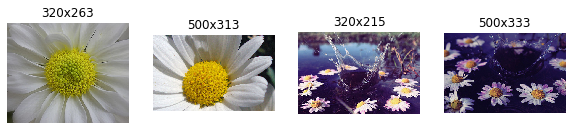

Class: dandelion


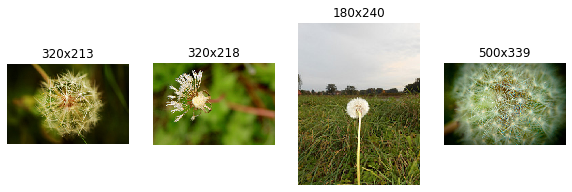

Class: roses


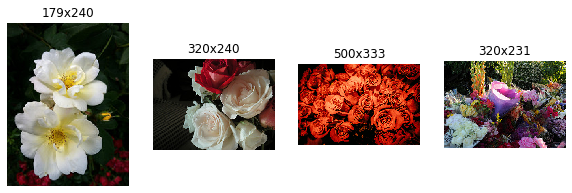

Class: sunflowers


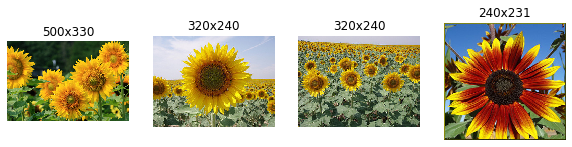

Class: tulips


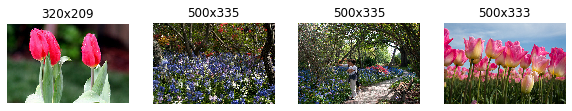

In [85]:
import matplotlib.image as mpimg
n_examples_per_class = 4

for flower_class in flower_classes:
    print("Class:", flower_class)
    plt.figure(figsize=(10,5))
    for index, example_image_path in enumerate(image_paths[flower_class][:n_examples_per_class]):
        example_image = mpimg.imread(example_image_path)[:,:,:channels]
        plt.subplot(100+ n_examples_per_class * 10 + index + 1)
        plt.title("{}x{}".format(example_image.shape[1], example_image.shape[0]))
        plt.imshow(example_image)
        plt.axis("off")
    plt.show()


### Preprocessing step for cropping images to 299 x 299

In [ ]:
from skimage.transform import resize

def prepare_image(image,target_width=299,target_height=299, max_zoom=0.2):
    